# Fokas Lennelles Equation

$$u_{xt} - u  + 2 i|u|^2u_x=0$$

$x \quad ϵ \quad  [-1,1]$

$t \quad ϵ \quad  [0,1]$

# New Section

$$(r +im)_{xt} - (r+im)  + 2 i(r^2 + m^2)(r+im)_x=0$$
**1. Real part**
$$r_{xt} - r  -2 (r^2 + m^2)m_x=0$$
2. **Imaginary part**
$$m_{xt} - m  +2 (r^2 + m^2)r_x=0$$

**Dark Soliton**

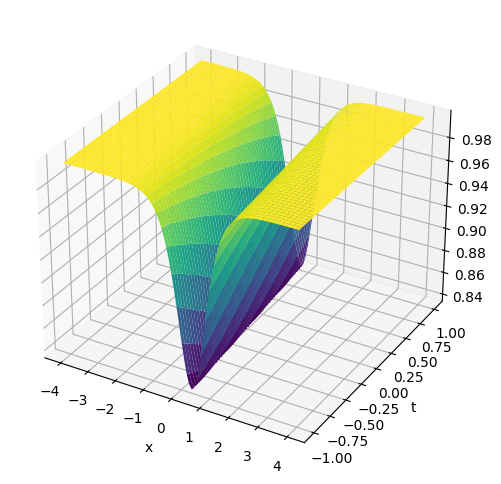

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


N =100
x_min = -4
x_max = 4
t_min = -1
t_max = 1

x_space = np.linspace(x_min, x_max, N)
t_space = np.linspace(t_min, t_max, N)
x, t = np.meshgrid(x_space, t_space)

k = 1
rho = 1

a = np.sqrt(k**3*rho**2*(1+k*rho**2))
b = k*rho**2


c = k*rho**2/(a**2 +b**2)
theta = a*(x + c*t)
w = 1/k + 2*rho**2



r = rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta)))*np.cos(k*x - w*t) )-\
(2*a**2*(a**2 + b**2)*np.exp(2*theta) )*np.sin(k*x - w*t)-\
( np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta) ))*np.cos(k*x - w*t)+\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta) ) )*np.sin(k*x - w*t)+\
(np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta) )*np.sin(k*x - w*t)+\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta))*np.cos(k*x - w*t ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta) )**2 + a**2*np.exp(4*theta) ) )


m = rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta)))*np.sin(k*x - w*t) )+\
(2*a**2*(a**2 + b**2)*np.exp(2*theta) )*np.cos(k*x - w*t)-\
( np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta) ))*np.sin(k*x - w*t)-\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta) ) )*np.cos(k*x - w*t)-\
(np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta) )*np.cos(k*x - w*t)+\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta))*np.sin(k*x - w*t ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta) )**2 + a**2*np.exp(4*theta) ) )


UU = np.sqrt(r**2 + m**2)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x, t, UU, cmap="viridis")
plt.xlabel("x")
plt.ylabel("t")
plt.show()

PINN to solve PDE

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
torch.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


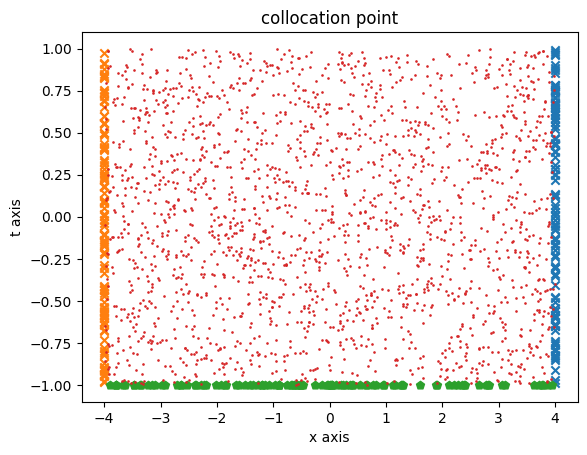

'#collocation points\n#plt.scatter(x_b2, t_b2, marker=\'x\')\n#plt.scatter(x_b1, t_b1, marker=\'x\')\n#plt.scatter(x_0, t_0, marker=\'p\')\nplt.scatter(np.vstack((x_c, x_c1)), np.vstack((t_c, t_c1)), s=0.8)\nplt.xlabel("x axis")\nplt.ylabel("t axis")\n\nplt.savefig("collocationn_triangular.png", dpi=\'figure\', transparent = True)\nplt.title("collocation point")\nplt.show()'

In [ ]:


N_0 = 100
N_b = 100
N_r = 2000
np.random.seed(2)

#initial at U(x, t=0)
x_0 = np.random.uniform(low=x_min, high=x_max, size=(N_0, 1))
t_0 = np.ones((N_0, 1), dtype=np.float64)*t_min

theta = a*(x_0 + c*t_min)
# real initial at t=t_min
r_0=rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta)))*np.cos( k*x_0 - w*t_min ) )-\
(2*a**2*(a**2 + b**2)*np.exp(2*theta) )*np.sin(k*x_0 - w*t_min)-\
( np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta) ))*np.cos(k*x_0 - w*t_min)+\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta) ) )*np.sin(k*x_0 - w*t_min)+\
(np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta) )*np.sin(k*x_0 - w*t_min)+\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta))*np.cos(k*x_0 - w*t_min ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta) )**2 + a**2*np.exp(4*theta) ) )


#imaginary
m_0 = rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta)))*np.sin(k*x_0 - w*t_min) )+\
(2*a**2*(a**2 + b**2)*np.exp(2*theta) )*np.cos(k*x_0 - w*t_min)-\
( np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta) ))*np.sin(k*x_0 - w*t_min)-\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta) ) )*np.cos(k*x_0 - w*t_min)-\
(np.exp(2*theta)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta) )*np.cos(k*x_0 - w*t_min)+\
(np.exp(2*theta)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta))*np.sin(k*x_0 - w*t_min ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta) )**2 + a**2*np.exp(4*theta) ) )


# initial condition



t_b1 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b1 = np.ones((N_b, 1), dtype=np.float64)*x_min

#Dirichlet BC left |U|=1
chi1 = k*x_min - w*t_b1
theta1 = a*(x_min + c*t_b1)

#r left
r_left = rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta1)))*np.cos(chi1) )-\
(2*a**2*(a**2 + b**2)*np.exp(2*theta1) )*np.sin(chi1)-\
( np.exp(2*theta1)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta1) ))*np.cos(chi1)+\
(np.exp(2*theta1)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta1) ) )*np.sin(chi1)+\
(np.exp(2*theta1)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta1) )*np.sin(chi1)+\
(np.exp(2*theta1)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta1))*np.cos(chi1 ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta1) )**2 + a**2*np.exp(4*theta1) ) )



# m left
m_left = rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta1)))*np.sin(chi1) )+\
(2*a**2*(a**2 + b**2)*np.exp(2*theta1) )*np.cos(chi1)-\
( np.exp(2*theta1)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta1) ))*np.sin(chi1)-\
(np.exp(2*theta1)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta1) ) )*np.cos(chi1)-\
(np.exp(2*theta1)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta1) )*np.cos(chi1)+\
(np.exp(2*theta1)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta1))*np.sin(chi1 ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta1) )**2 + a**2*np.exp(4*theta1) ) )

#U_b1 = np.ones((N_b, 1), dtype=np.float64)*1.0

t_b2 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b2 = np.ones((N_b, 1), dtype=np.float64)*x_max

chi2 = k*x_max - w*t_b2
theta2 = a*(x_max + c*t_b2)

#r right
r_right = rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta2)))*np.cos(chi2) )-\
(2*a**2*(a**2 + b**2)*np.exp(2*theta2) )*np.sin(chi2)-\
( np.exp(2*theta2)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta2) ))*np.cos(chi2)+\
(np.exp(2*theta2)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta2) ) )*np.sin(chi2)+\
(np.exp(2*theta2)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta2) )*np.sin(chi2)+\
(np.exp(2*theta2)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta2))*np.cos(chi2 ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta2) )**2 + a**2*np.exp(4*theta2) ) )


# m right
m_right = rho*( ( (2*a*(a**2 + b**2)*(2*a + (k+b)*np.exp(2 * theta2)))*np.sin(chi2) )+\
(2*a**2*(a**2 + b**2)*np.exp(2*theta2) )*np.cos(chi2)-\
( np.exp(2*theta2)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*( 2*a + (k+b)*np.exp(2*theta2) ))*np.sin(chi2)-\
(np.exp(2*theta2)*( (k+b)*2*a*b + a*(a**2 - b**2))*( 2*a + (k+b)*np.exp(2*theta2) ) )*np.cos(chi2)-\
(np.exp(2*theta2)*(  (k+b)*(a**2 - b**2) - 2*a**2*b )*a*np.exp(2*theta2) )*np.cos(chi2)+\
(np.exp(2*theta2)*( (k+b)*2*a*b + a*(a**2 - b**2) )*a*np.exp(2*theta2))*np.sin(chi2 ) )\
 /( (a**2 + b**2)*( (2*a + (k+b)*np.exp(2*theta2) )**2 + a**2*np.exp(4*theta2) ) )









#Dirichlet BC
#U_b2 = np.ones((N_b, 1), dtype=np.float64)*1.0


x_c = np.random.uniform(low=x_min, high=x_max, size=(N_r, 1))
t_c = np.random.uniform(low=t_min, high=t_max, size=(N_r, 1))

#x_c1 = np.random.triangular(x_min,-4, x_max, size=(400, 1))
#t_c1 = np.random.triangular(t_min, 0.9, t_max, size=(400, 1))


#x_c = np.vstack((x_c,x_c1))
#t_c = np.vstack((t_c,t_c1))


"""plt.scatter(x_0, r_0)
plt.xlabel("x axis")
plt.ylabel("r")
plt.show()

plt.scatter(x_0, m_0)
plt.xlabel("x axis")
plt.ylabel("m")
plt.show()
plt.scatter(x_0, np.sqrt(m_0**2 + r_0**2))
plt.xlabel("x axis")
plt.ylabel("U")
plt.show()"""

#collocation points
#plt.figure(figsize=(10,4))
plt.scatter(x_b2, t_b2, marker='x')
plt.scatter(x_b1, t_b1, marker='x')
plt.scatter(x_0, t_0, marker='p')
plt.scatter(x_c, t_c, s=0.8)
plt.xlabel("x axis")
plt.ylabel("t axis")

plt.savefig("collocationn_gaussian.png", dpi='figure', transparent = True)
plt.title("collocation point")
plt.show()


"""#collocation points
#plt.scatter(x_b2, t_b2, marker='x')
#plt.scatter(x_b1, t_b1, marker='x')
#plt.scatter(x_0, t_0, marker='p')
plt.scatter(np.vstack((x_c, x_c1)), np.vstack((t_c, t_c1)), s=0.8)
plt.xlabel("x axis")
plt.ylabel("t axis")

plt.savefig("collocationn_triangular.png", dpi='figure', transparent = True)
plt.title("collocation point")
plt.show()"""

#Neural Network

## We consider Neural Network as our solution u(x,t)

In [ ]:


class Neural_network(nn.Module):
  def __init__(self):
    super(Neural_network, self).__init__()
    self.input_layer = nn.Linear(2,60)

    #self.dropout = nn.Dropout(0.25)
    self.hidden_layer1 = nn.Linear(60,60)
    self.hidden_layer2 = nn.Linear(60,60)
    self.hidden_layer3 = nn.Linear(60,60)
    self.hidden_layer4 = nn.Linear(60,60)
    self.hidden_layer5 = nn.Linear(60,60)
    self.hidden_layer6 = nn.Linear(60,60)
    self.hidden_layer7 = nn.Linear(60,60)
    self.hidden_layer8 = nn.Linear(60,60)
    self.output_layer = nn.Linear(60,2)

  def morlet(self, x):
    return torch.cos(7/4 *x)*torch.exp((-x**2)/2)
  def maxican(self, x):
    return (1 - x**2)*torch.exp((-x**2)/2)
  def gause(self, x):
    return (- x)*torch.exp((-x**2)/2)
  def tanh_2(self,x):
    return torch.tanh(x)**2


  def forward(self, x):

    x = self.input_layer(x)
    x = torch.tanh(x)
    x = torch.tanh(self.hidden_layer1(x))
    x = torch.tanh(self.hidden_layer2(x))

    #x = self.dropout(x)
    x = torch.tanh(self.hidden_layer3(x))
    x = torch.tanh(self.hidden_layer4(x))
    x = torch.tanh(self.hidden_layer5(x))
    x = torch.tanh(self.hidden_layer6(x))
    x = torch.tanh(self.hidden_layer7(x))
    x = torch.tanh(self.hidden_layer8(x))
    x = self.output_layer(x)
    return x

In [ ]:
Net = Neural_network()
Net = Net.to(device)
loss_fu = nn.MSELoss()
optim = torch.optim.Adam(Net.parameters(), lr=0.001)

#scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[20000,30000], gamma=0.1)

In [ ]:
#initail
x_01 = torch.autograd.Variable( torch.from_numpy(x_0).float(), requires_grad=False).to(device)
t_01 = torch.autograd.Variable( torch.from_numpy(t_0).float(), requires_grad=False).to(device)
R_01 = torch.autograd.Variable( torch.from_numpy(r_0).float(), requires_grad=False).to(device)
M_01 = torch.autograd.Variable( torch.from_numpy(m_0).float(), requires_grad=False).to(device)
X_0 = torch.cat([x_01, t_01], axis=1)

#BC1
x_b11 = torch.autograd.Variable( torch.from_numpy(x_b1).float(), requires_grad=True).to(device)
t_b11 = torch.autograd.Variable( torch.from_numpy(t_b1).float(), requires_grad=False).to(device)
R_left = torch.autograd.Variable( torch.from_numpy(r_left).float(), requires_grad=False).to(device)
M_left = torch.autograd.Variable( torch.from_numpy(m_left).float(), requires_grad=False).to(device)

X_b1 = torch.cat([x_b11, t_b11], axis=1)

#BC2
x_b21 = torch.autograd.Variable( torch.from_numpy(x_b2).float(), requires_grad=True).to(device)
t_b21 = torch.autograd.Variable( torch.from_numpy(t_b2).float(), requires_grad=False).to(device)
R_right = torch.autograd.Variable( torch.from_numpy(r_right).float(), requires_grad=False).to(device)
M_right = torch.autograd.Variable( torch.from_numpy(m_right).float(), requires_grad=False).to(device)
X_b2 = torch.cat([x_b21, t_b21], axis=1)



U_b1 = np.ones((N_b, 1), dtype=np.float64)*1.0
U_b11 = torch.autograd.Variable( torch.from_numpy(U_b1).float(), requires_grad=False).to(device)

# PDE Loss

In [ ]:
def pde(x, t, Net):
  x_1 = torch.autograd.Variable( torch.from_numpy(x).float(), requires_grad=True).to(device)
  t_1 = torch.autograd.Variable( torch.from_numpy(t).float(), requires_grad=True).to(device)
  X = torch.cat([x_1, t_1], axis=1)

  rr = Net.forward(X)[:, 0:1]
  mm = Net.forward(X)[:, 1:2]

  r_x = torch.autograd.grad(rr.sum(), x_1, create_graph=True)[0]
  r_xx = torch.autograd.grad(r_x.sum(), x_1, create_graph=True)[0]
  r_xxx = torch.autograd.grad(r_xx.sum(), x_1, create_graph=True)[0]
  r_t = torch.autograd.grad(rr.sum(), t_1, create_graph=True)[0]
  r_xt = torch.autograd.grad(r_t.sum(), x_1, create_graph=True)[0]

  m_x = torch.autograd.grad(mm.sum(), x_1, create_graph=True)[0]
  m_xx = torch.autograd.grad(m_x.sum(), x_1, create_graph=True)[0]
  m_xxx = torch.autograd.grad(m_xx.sum(), x_1, create_graph=True)[0]
  m_t = torch.autograd.grad(mm.sum(), t_1, create_graph=True)[0]
  m_xt = torch.autograd.grad(m_t.sum(), x_1, create_graph=True)[0]


  pde1 = r_xt - rr - 2*(rr**2 + mm**2)*m_x
  pde2 = m_xt - mm  + 2*(rr**2 + mm**2)*r_x


  #H1 = integrate (r_x**2 + m_x**2) dx

  def integral_approximation(f, aa):
    return (aa.max() - aa.min() )*torch.mean(f)


  # H1
  H = (r_x**2 + m_x**2)
  H1 = integral_approximation(H, x_1 )
  H1_t = torch.autograd.grad(H1.sum(), t_1, create_graph=True)[0]

  #H3
  H3_real = (r_x**2 + m_x**2)**2 - r_xx*m_x + r_x*m_xx
  H3_imag = -(r_x*r_xx + m_x*m_xx)

  H3_real_integrate = integral_approximation(H3_real, x_1 )
  H3_imag_integrate = integral_approximation(H3_imag, x_1 )

  H3r_t = torch.autograd.grad(H3_real_integrate.sum() , t_1, create_graph=True)[0]
  H3m_t = torch.autograd.grad(H3_imag_integrate.sum() , t_1, create_graph=True)[0]

  #H5
  H5_real = -(r_x*r_xxx + m_x*m_xxx) + 2*(r_x**2 + m_x**2)**3 + 3*(r_x**2 + m_x**2)*(r_x*m_xx -r_xx*m_x)
  H5_imag = -(-r_xxx*m_x + r_x*m_xxx) - 3*(r_x**2 + m_x**2)*(r_x*r_xx + m_x*m_xx)

  H5_real_integrate = integral_approximation(H5_real, x_1 )
  H5_imag_integrate = integral_approximation(H5_imag, x_1 )

  H5r_t = torch.autograd.grad(H5_real_integrate.sum() , t_1, create_graph=True)[0]
  H5m_t = torch.autograd.grad(H5_imag_integrate.sum() , t_1, create_graph=True)[0]

  #H-1
  H11_real = -rr*m_x + r_x*mm
  H11_imag = -r_x*rr - mm*m_x

  H11_real_integrate = integral_approximation(H11_real, x_1 )
  H11_imag_integrate = integral_approximation(H11_imag, x_1 )

  H11r_t = torch.autograd.grad(H11_real_integrate.sum() , t_1, create_graph=True)[0]
  H11m_t = torch.autograd.grad(H11_imag_integrate.sum(), t_1, create_graph=True)[0]

  #H-3
  H33_real = -(rr**2 + mm**2) - (rr**2+mm**2)*(rr*m_x - r_x*mm)
  H33_imag = -(rr**2 + mm**2)*(rr*r_x + mm*m_x)

  H33_real_integrate = integral_approximation(H33_real, x_1 )
  H33_imag_integrate = integral_approximation(H33_imag, x_1 )

  H33r_t = torch.autograd.grad(H33_real_integrate.sum() , t_1, create_graph=True)[0]
  H33m_t = torch.autograd.grad(H33_imag_integrate.sum(), t_1, create_graph=True)[0]





  return pde1, pde2, H1_t, H3r_t, H3m_t, H5r_t, H5m_t, H11r_t, H11m_t, H33r_t, H33m_t

#Loss

In [ ]:
number_of_epoch =50000
loss_value = []
loss_value1 = []
loss_value2 = []
loss_value3 = []
for epoch in range(number_of_epoch):
  optim.zero_grad()       # make the gradient zero

  r_pred_0, m_pred_0  = Net.forward(X_0)[:, 0:1], Net.forward(X_0)[:, 1:2]      #forward pass
  Loss_initial = loss_fu(r_pred_0, R_01 ) + loss_fu(m_pred_0, M_01 )    # loss of initial

  r_pred_b1, m_pred_b1 = Net.forward(X_b1)[:, 0:1], Net.forward(X_b1)[:, 1:2]
  Loss_b1 = loss_fu( r_pred_b1, R_left) + loss_fu(m_pred_b1, M_left)             # left boudary loss

  Loss_b1_new = loss_fu( (r_pred_b1**2 + m_pred_b1**2), U_b11)

  r_pred_b2, m_pred_b2 = Net.forward(X_b2)[:, 0:1], Net.forward(X_b2)[:, 1:2]
  Loss_b2 = loss_fu( r_pred_b2, R_right) + loss_fu(m_pred_b2, M_right)            #right boundary loss

  Loss_b2_new = loss_fu( (r_pred_b2**2 + m_pred_b2**2), U_b11)

  r_pred_b1_x = torch.autograd.grad(r_pred_b1.sum(), x_b11, create_graph=True)[0]
  m_pred_b1_x = torch.autograd.grad(m_pred_b1.sum(), x_b11, create_graph=True)[0]

  r_pred_b2_x = torch.autograd.grad(r_pred_b2.sum(), x_b21, create_graph=True)[0]
  m_pred_b2_x = torch.autograd.grad(m_pred_b2.sum(), x_b21, create_graph=True)[0]

  loss_b3 = loss_fu(r_pred_b1_x, r_pred_b2_x)
  loss_b4 = loss_fu(m_pred_b1_x, m_pred_b2_x)


  pdee1, pdee2, H1_t, H3r_t, H3m_t, H5r_t, H5m_t, H11r_t, H11m_t, H33r_t, H33m_t= pde(x_c, t_c, Net)                # pde losss
  Loss_pde = torch.linalg.norm(pdee1) + torch.linalg.norm(pdee2)

  Loss_conserve1 = torch.linalg.norm(H1_t)
  Loss_conserve3 = torch.linalg.norm(H3r_t) + torch.linalg.norm(H3m_t)
  Loss_conserve5 = torch.linalg.norm(H5r_t) + torch.linalg.norm(H5m_t)
  Loss_conserve11 = 2*(torch.linalg.norm(H11r_t) + torch.linalg.norm(H11m_t))
  Loss_conserve33 = torch.linalg.norm(H33r_t) + torch.linalg.norm(H33m_t)








  total_loss =  (Loss_initial +  Loss_b1 + Loss_b2)   +  0.001*( Loss_pde) + 0.001*(Loss_conserve5 )#+ Loss_conserve33)\
                    #Loss_conserve1 + Loss_conserve3 + Loss_conserve5 + )  #+ loss_b3 + loss_b4

  total_loss.backward()    # computing gradients using backward propagation  dL/dw
  optim.step()             # This is equivalent to : Weight_new = weight_old - learing_rate * derivative of Loss w.r.t weight
  #scheduler.step()

  loss_value.append(total_loss.cpu().detach().numpy())
  loss_value1.append(Loss_conserve1.cpu().detach().numpy())
  loss_value3.append(Loss_conserve3.cpu().detach().numpy())

  loss_value2.append(Loss_pde.cpu().detach().numpy())
  with torch.autograd.no_grad():
    if epoch%100==0:
      print(f'epoch:{epoch}, loss:{total_loss.item():.8f}, Loss_conserve1:{Loss_conserve1.item():.8f},Loss_conserve3:{Loss_conserve3.item():.8f}, Loss_pde:{Loss_pde.item():.8f}')

plt.plot(loss_value)
plt.show()
plt.plot(loss_value1)
plt.show()
plt.plot(loss_value2)
plt.show()

epoch:0, loss:2.93508601, Loss_conserve1:0.00000025,Loss_conserve3:0.00000032, Loss_pde:2.88055038
epoch:100, loss:0.30776283, Loss_conserve1:0.19562314,Loss_conserve3:0.84258878, Loss_pde:96.35636139
epoch:200, loss:0.09714710, Loss_conserve1:0.11707956,Loss_conserve3:0.36331755, Loss_pde:78.92399597
epoch:300, loss:0.08364540, Loss_conserve1:0.10820462,Loss_conserve3:0.32471365, Loss_pde:72.89100647
epoch:400, loss:0.11029694, Loss_conserve1:0.10110776,Loss_conserve3:0.29661208, Loss_pde:69.89437866
epoch:500, loss:0.07939212, Loss_conserve1:0.10434718,Loss_conserve3:0.30098757, Loss_pde:67.60353851
epoch:600, loss:0.07110038, Loss_conserve1:0.10431965,Loss_conserve3:0.29620990, Loss_pde:65.05493164
epoch:700, loss:0.06768517, Loss_conserve1:0.10422517,Loss_conserve3:0.29171556, Loss_pde:62.79666901
epoch:800, loss:0.06536132, Loss_conserve1:0.10462104,Loss_conserve3:0.28795949, Loss_pde:60.54364777
epoch:900, loss:0.06146010, Loss_conserve1:0.10342596,Loss_conserve3:0.27344319, Loss

In [ ]:
a = np.array(loss_value) # total
b = np.array(loss_value2) # pde


# original PINN
np.savetxt('loss_value_dark_total_PH5.csv', a, delimiter=',')
np.savetxt('loss_value_dark_pde_PH5.csv', b, delimiter=',')

## loss curve
## total time need to train

In [ ]:
#plot


X = np.hstack((x.flatten()[:, None], t.flatten()[:, None]))
X_tensor = torch.from_numpy(X).float().to(device)

R_pred = Net.forward(X_tensor)[:, 0:1] # if use GPU
R_pred1 = R_pred.detach().cpu().numpy().reshape(N, N)

M_pred = Net.forward(X_tensor)[:, 1:2] # if use GPU
M_pred1 = M_pred.detach().cpu().numpy().reshape(N, N)



from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x, t, np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$U(x,t)$')
plt.savefig("datadriven_dark_3d_fle.pdf", dpi='figure', transparent = True)
plt.show()


fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x, t, np.sqrt(r**2 + m**2), cmap="viridis")
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$U(x,t)$')
plt.savefig("exact_dark_3d_fle.pdf", dpi='figure', transparent = True)
plt.show()

In [ ]:
plt.pcolor(x, t, np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.title("predicted")
plt.colorbar()
plt.savefig("density_datadriven_dark_fle.pdf", dpi='figure', transparent = True)
plt.show()

plt.pcolor(x, t, np.sqrt(r**2 + m**2), cmap="viridis")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.title("exact")
plt.colorbar()
plt.savefig("density_exact_dark_fle.pdf", dpi='figure', transparent = True)
plt.show()

error = np.sqrt(R_pred1**2 + M_pred1**2) - np.sqrt(r**2 + m**2)
plt.pcolor(x, t, error, cmap="viridis")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.title("error")
plt.colorbar()
plt.savefig("error_dark_fle.pdf", dpi='figure', transparent = True)
plt.show()

In [ ]:
U_predicted= np.sqrt(R_pred1**2 + M_pred1**2)
for ml in range(0 , N, 10):
  plt.plot(x_space, U_predicted[ml, :])
  plt.xlabel("x")
  plt.ylabel("|U|")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(U_predicted[ml, :]**2))

In [ ]:


for mk in range(0 , N, 10):
  plt.plot(x_space, UU[mk, :])
  plt.xlabel("x")
  plt.ylabel("U")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(UU[mk, :]**2))

In [ ]:
plt.plot(x_space, UU[85,:], 'b-', linewidth = 2, label = 'Exact')
plt.plot(x_space, U_predicted[85,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')
plt.title('$t = %.2f$' % (t_space[85]), fontsize = 10)
plt.legend()
plt.savefig("compare11_dark_conserve.pdf", dpi='figure', transparent = True)
plt.show()

plt.plot(x_space, UU[35,:], 'b-', linewidth = 2, label = 'Exact')
plt.plot(x_space, U_predicted[35,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')
plt.title('$t = %.2f$' % (t_space[35]), fontsize = 10)
plt.legend()
plt.savefig("compare22_dark_conserve.pdf", dpi='figure', transparent = True)
plt.show()


plt.plot(x_space, UU[15,:], 'b-', linewidth = 2, label = 'Exact')
plt.plot(x_space, U_predicted[15,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')
plt.title('$t = %.2f$' % (t_space[15]), fontsize = 10)
plt.legend()
plt.savefig("compare33_dark_conserve.pdf", dpi='figure', transparent = True)
plt.show()